In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from query import connect, avg_daily_sentiment

Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-10-1f498ee1cb6b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_30_days_df['date'] = pd.to_datetime(last_30_days_df['date'])


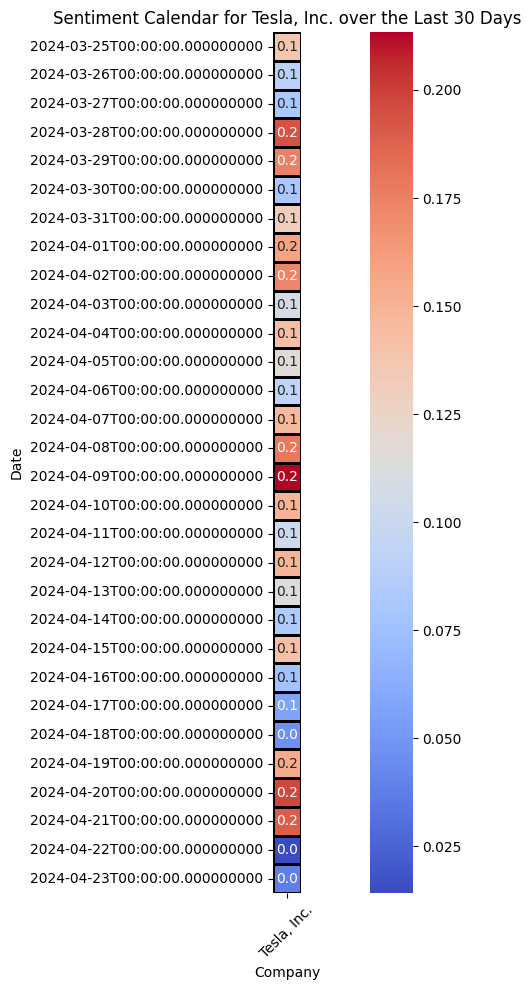

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from query import connect, avg_daily_sentiment

# Function to create heatmap
def create_heatmap(company_name):
    # Retrieve sentiment data for all companies
    sentiment_df = avg_daily_sentiment()

    # Filter sentiment data for the specified company name
    company_sentiment_df = sentiment_df[sentiment_df['company_name'] == company_name]

    # Get the last available date
    last_date = company_sentiment_df['date'].max()

    # Calculate the date 30 days ago
    start_date = last_date - timedelta(days=29)

    # Filter sentiment data for the last 30 days
    last_30_days_df = company_sentiment_df[(company_sentiment_df['date'] >= start_date) & (company_sentiment_df['date'] <= last_date)]

    # Convert the 'date' column to datetime type
    last_30_days_df['date'] = pd.to_datetime(last_30_days_df['date'])

    # Pivot the DataFrame to prepare for heatmap
    heatmap_df = last_30_days_df.pivot(index="date", columns="company_name", values="sentiment_value")

    # Create calendar-like heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(heatmap_df, cmap='coolwarm', annot=True, fmt=".1f", linewidths=1, linecolor='black', square=True)

    # Set ticks and labels
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    plt.title(f"Sentiment Calendar for {company_name} over the Last 30 Days")
    plt.xlabel("Company")
    plt.ylabel("Date")
    plt.tight_layout()
    plt.show()

# Example: Company name for which you want to create the heatmap
company_name = "Tesla, Inc."  # Replace with the actual company name
create_heatmap(company_name)
